# Import libraries

In [170]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "vscode"

import plotly.graph_objects as go

import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

import datetime  

pd.set_option('display.max_columns', 200)

# Basic stats

In [171]:
zones_df = pd.read_csv("taxi-zone-lookup.csv")
# Basic stats
print("Number of rows : {}".format(zones_df.shape[0]))
print()

print("Number of columns : {}".format(zones_df.shape[1]))
print()

print("Display of dataset: ")
display(zones_df.head())
print()

print("Basics statistics: ")
data_desc = zones_df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*zones_df.isnull().sum()/zones_df.shape[0])

Number of rows : 265

Number of columns : 3

Display of dataset: 


LocationID        Borough                     Zone
0           1            EWR           Newark Airport
1           2         Queens              Jamaica Bay
2           3          Bronx  Allerton/Pelham Gardens
3           4      Manhattan            Alphabet City
4           5  Staten Island            Arden Heights


Basics statistics: 


LocationID Borough                                           Zone
count   265.000000     265                                            265
unique         NaN       7                                            261
top            NaN  Queens  Governor's Island/Ellis Island/Liberty Island
freq           NaN      69                                              3
mean    133.000000     NaN                                            NaN
std      76.643112     NaN                                            NaN
min       1.000000     NaN                                            NaN
25%      67.000000     NaN                                            NaN
50%     133.000000     NaN                                            NaN
75%     199.000000     NaN                                            NaN
max     265.000000     NaN                                            NaN


Percentage of missing values: 


LocationID    0.0
Borough       0.0
Zone          0.0
dtype: float64

# Dataset & stats

In [172]:
april14_df = pd.read_csv("uber-raw-data-apr14.csv")
sep14_df = pd.read_csv("uber-raw-data-sep14.csv")

pick_up_df = pd.concat([april14_df, sep14_df])

In [173]:
# Basic stats
print("Number of rows : {}".format(pick_up_df.shape[0]))
print()

print("Number of columns : {}".format(pick_up_df.shape[1]))
print()

print("Display of dataset: ")
display(pick_up_df.head())
print()

print("Basics statistics: ")
data1_desc = pick_up_df.describe(include='all')
display(data1_desc)
print()

print("Percentage of missing values: ")
display(100*pick_up_df.isnull().sum()/pick_up_df.shape[0])

Number of rows : 1592652

Number of columns : 4

Display of dataset: 


Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


Basics statistics: 


Date/Time           Lat           Lon     Base
count             1592652  1.592652e+06  1.592652e+06  1592652
unique              84906           NaN           NaN        5
top     4/7/2014 20:21:00           NaN           NaN   B02617
freq                   97           NaN           NaN   485696
mean                  NaN  4.073950e+01 -7.397359e+01      NaN
std                   NaN  3.921414e-02  5.569756e-02      NaN
min                   NaN  3.998970e+01 -7.477360e+01      NaN
25%                   NaN  4.072130e+01 -7.399670e+01      NaN
50%                   NaN  4.074200e+01 -7.398370e+01      NaN
75%                   NaN  4.076100e+01 -7.396540e+01      NaN
max                   NaN  4.211660e+01 -7.206660e+01      NaN


Percentage of missing values: 


Date/Time    0.0
Lat          0.0
Lon          0.0
Base         0.0
dtype: float64

# Features engineering

In [174]:
# Convertir la colonne date en objet datetime 
pick_up_df["Date/Time"] = pd.to_datetime(pick_up_df["Date/Time"])

pick_up_df["dayofweek"] = pick_up_df["Date/Time"].apply(lambda x : x.dayofweek)
pick_up_df["hour"] = pick_up_df["Date/Time"].apply(lambda x : x.hour)
pick_up_df["month"] = pick_up_df["Date/Time"].apply(lambda x : x.month)

pick_up_df.head()

Date/Time      Lat      Lon    Base  dayofweek  hour  month
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512          1     0      4
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512          1     0      4
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512          1     0      4
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512          1     0      4
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512          1     0      4

In [175]:
pick_up_sample = pick_up_df.sample(20000)

# Data visualization

In [176]:
# Univariate analysis
# Distribution of each numeric variable
fig = px.histogram(pick_up_sample, x= "Base", title ='Base repartition', width = 1000, height=400)
fig.update_layout(title_x=0.5)
fig.show()

fig = px.histogram(pick_up_sample, x= "dayofweek", title ='Day of week repartition', width = 1000, height=400)
fig.update_layout(title_x=0.5)
fig.show()

fig = px.histogram(pick_up_sample, x= "hour", title ='Hours repartition', width = 1000, height=400)
fig.update_layout(title_x=0.5)
fig.show()

Analysis:
- Base repartition: bases B02764 & B02512 have lower pickups, the 3 other bases have the same level of pickup. We will check later if they all follow similar patterns.
- The number of pickups are pretty similar for every day except for monday and sunday (they are a little lower).
- The hours with higher pickups numbers are from 4 to 8pm, and lowest from 2 to 4am 

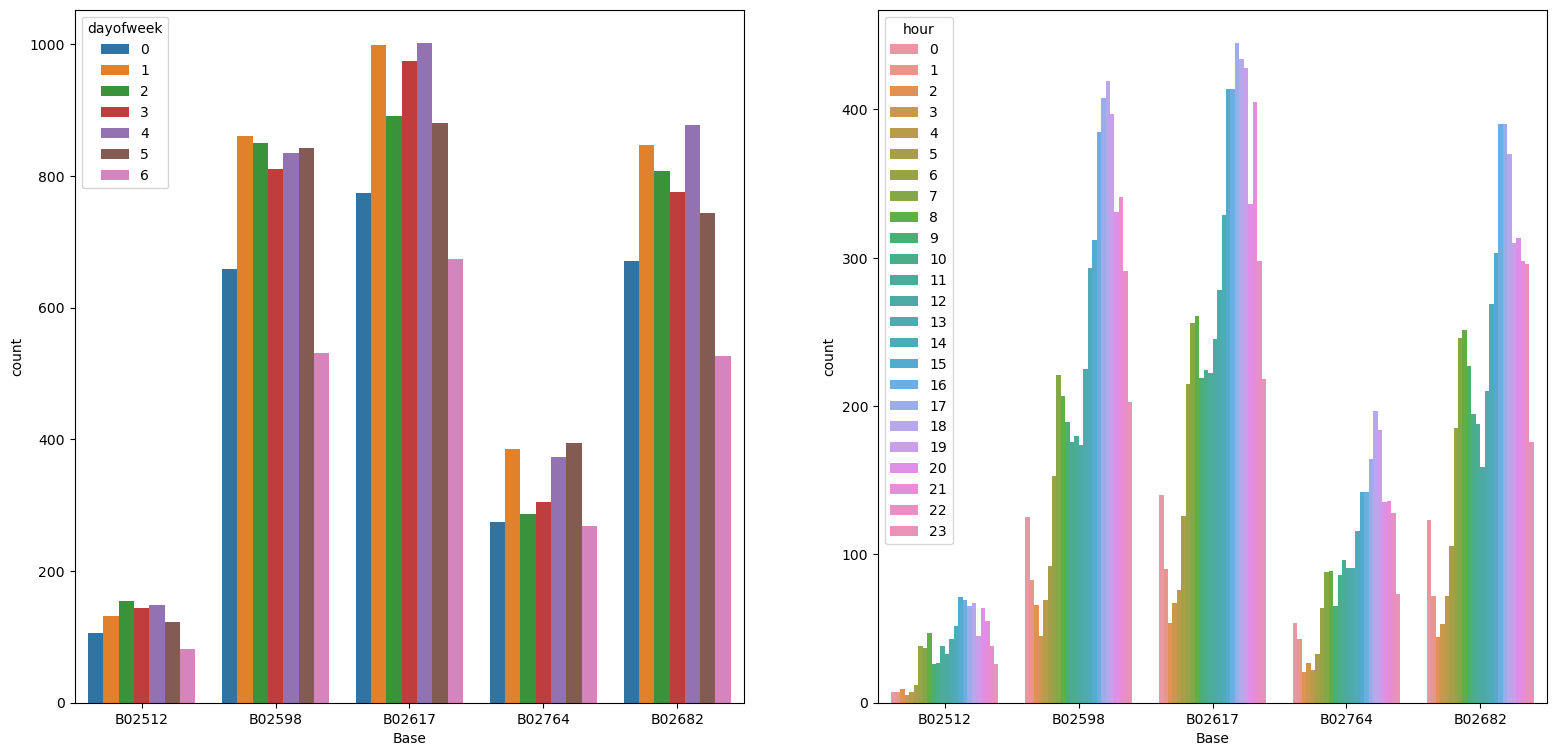

In [177]:
# Distribution per base
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(19,9))
sns.countplot(data=pick_up_sample,x="Base",hue="dayofweek", ax=ax1,)
sns.countplot(data=pick_up_sample,x="Base",hue="hour", ax=ax2)
plt.show()

Analysis:
The bases have similar pattern over the week and the day.

In [178]:
# We replace the numbers by days for the column "dayofweek"
pick_up_sample['dayofweek'] = pick_up_sample['dayofweek'].apply(lambda x : "Monday" if x == 0
                                                                      else "Tuesday" if x == 1
                                                                      else "Wednesday" if x == 2
                                                                      else "Thursday" if x == 3
                                                                      else "Friday" if x == 4
                                                                      else "Saturday" if x == 5
                                                                      else "Sunday")

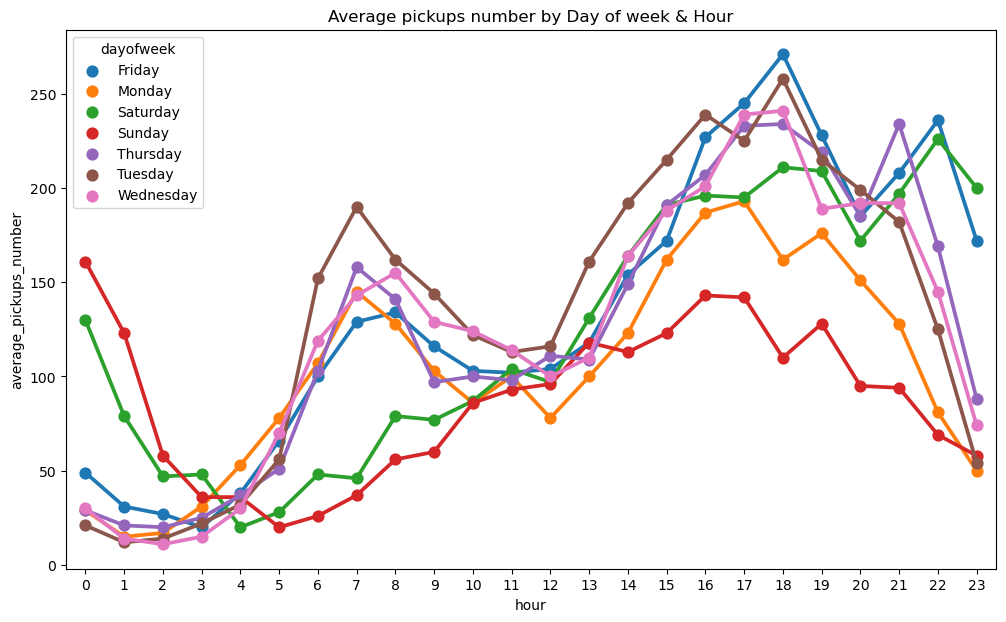

In [179]:
hourly_avg = pick_up_sample.groupby(['hour','dayofweek'])['Date/Time'].count().reset_index()
daily_hourly_avg = hourly_avg.groupby(['dayofweek','hour'])['Date/Time'].mean().reset_index().rename(columns = {'Date/Time':'average_pickups_number'})

plt.figure(figsize=(12,7)) 
sns.pointplot(x="hour", y="average_pickups_number", hue="dayofweek", data = daily_hourly_avg).set_title("Average pickups number by Day of week & Hour")
plt.show()

ANALYSIS
- During the week: there is the same pattern for each day. From monday to friday there are two peaks: from 5 to 9am (people are going to work) and from 3pm to 8pm (people are going back home).
- Saturday and Sunday have a different pattern.The average number of pickups is higher between midnight/3am than the pickups during the week. It is because people are going out during the weekends (bars, clubs...). And the average number of pickups is lower on mornings (between 5 and 9am) because people don't generally go to work during the weekends.

In [180]:
# Repartition of pickups
fig = px.scatter_mapbox(pick_up_sample, lat = 'Lat', lon='Lon',color = 'hour', mapbox_style='carto-positron', zoom=8.5, height=800)
fig.show()

Analysis:
We can see on the map that the Uber pickups are concentrated on Manhattan, Northern Brooklyn and Eastern Queens.

In [181]:
#pick_up_sample.drop("Date/Time",axis=1, inplace=True)
#pick_up_sample.drop("Base",axis=1, inplace=True)

# Preprocessing

In [182]:
# We choose the latitude and longitude features to train our model.
X = pick_up_sample[["Lat", "Lon"]]
preprocessor = StandardScaler()
X = preprocessor.fit_transform(X)
X[:5]

array([[ 1.07227951,  0.29492326],
       [-0.17868941, -0.351675  ],
       [ 0.72857896, -0.27329945],
       [-1.65710724,  0.16489111],
       [-1.2426448 , -0.37483141]])

# KMeans

#### Elbow

In [183]:
wcss =  []
k = []
for i in range (2,10): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

WCSS for K=2 --> 28875.14327549756
WCSS for K=3 --> 19928.622278735773
WCSS for K=4 --> 16542.382908250187
WCSS for K=5 --> 13274.553924004329
WCSS for K=6 --> 10777.619188778415
WCSS for K=7 --> 8841.42764324703
WCSS for K=8 --> 7752.031857641873
WCSS for K=9 --> 6843.386508695938


In [184]:
# Let's visualize using plotly
# Create DataFrame
wcss_frame = pd.DataFrame(wcss)
k_frame = pd.Series(k)

# Create figure
fig= px.line(
    wcss_frame,
    x=k_frame,
    y=wcss_frame.iloc[:,-1]
)

# Create title and axis labels
fig.update_layout(
    yaxis_title="Inertia",
    xaxis_title="# Clusters",
    title="Inertia per cluster",
    title_x=0.5
)
# Render
fig.show() 

#### Silhouette

In [185]:
# Computer mean silhouette score
sil = []
k = []

## Careful, you need to start at i=2 as silhouette score cannot accept less than 2 labels 
for i in range (2,10): 
    kmeans = KMeans(n_clusters= i, random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.6582706475463052
Silhouette score for K=3 is 0.41037992264754886
Silhouette score for K=4 is 0.38509240373906334
Silhouette score for K=5 is 0.43847868002717333
Silhouette score for K=6 is 0.4497940633863579
Silhouette score for K=7 is 0.465751003025124
Silhouette score for K=8 is 0.42478598807476436
Silhouette score for K=9 is 0.4281700777459693


In [186]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)
k_frame = pd.Series(k)

# Create figure
fig = px.bar(data_frame=cluster_scores,  
             x=k, 
             y=cluster_scores.iloc[:, -1]
            )

# Add title and axis labels
fig.update_layout(
    yaxis_title="Silhouette Score",
    xaxis_title="# Clusters",
    title="Silhouette Score per cluster",
    title_x=0.5
)

# Render
fig.show() 

Based on the silhouette methodology, the best number of clusters should be 2. However, we choose cluster number=8 because it was more appropriate for our objective.

# KMeans

In [187]:
kmeans = KMeans(n_clusters=8, random_state=0)
# Fit kmeans to our dataset
kmeans.fit(X)

KMeans(random_state=0)

In [188]:
pick_up_sample['Cluster_KMeans'] = kmeans.predict(X)
pick_up_sample.head()

Date/Time      Lat      Lon    Base  dayofweek  hour  month  \
33611  2014-04-30 08:15:00  40.7820 -73.9573  B02512  Wednesday     8      4   
56753  2014-09-04 11:51:00  40.7325 -73.9936  B02598   Thursday    11      9   
376295 2014-09-08 20:08:00  40.7684 -73.9892  B02617     Monday    20      9   
586211 2014-09-25 11:59:00  40.6740 -73.9646  B02617   Thursday    11      9   
979091 2014-09-24 18:58:00  40.6904 -73.9949  B02764  Wednesday    18      9   

        Cluster_KMeans  
33611                7  
56753                0  
376295               2  
586211               4  
979091               4

In [189]:
fig = px.scatter_mapbox(pick_up_sample, lat="Lat", lon="Lon", color="Cluster_KMeans",
                        mapbox_style="carto-positron",
                       animation_frame = "dayofweek")
fig.show()

In [190]:
# Focus on one day : Friday, each hour of the day
pick_up_sample_friday = pick_up_sample[pick_up_sample["dayofweek"] == "Friday"]
pick_up_sample_friday.head()

Date/Time      Lat      Lon    Base dayofweek  hour  month  \
947037 2014-09-19 19:20:00  40.7374 -73.9913  B02764    Friday    19      9   
259123 2014-04-11 17:23:00  40.7460 -73.9941  B02617    Friday    17      4   
73207  2014-09-05 23:27:00  40.7204 -73.9952  B02598    Friday    23      9   
869756 2014-09-05 23:26:00  40.8471 -73.9355  B02764    Friday    23      9   
358122 2014-04-04 19:30:00  40.7655 -73.9628  B02682    Friday    19      4   

        Cluster_KMeans  
947037               0  
259123               2  
73207                0  
869756               7  
358122               2

In [191]:
# Focus on one day : Friday, each hour of the day
fig = px.scatter_mapbox(pick_up_sample_friday.sort_values("hour"), lat="Lat", lon="Lon", color="Cluster_KMeans",
                        mapbox_style="carto-positron",
                       animation_frame = "hour")
fig.show()

In [192]:
# Univariate analysis
# Distribution of each numeric variable
fig = px.histogram(pick_up_sample["Cluster_KMeans"])
fig.show()

# DBScan

In [193]:
# Instanciate DBSCAN 
db = DBSCAN(eps=0.2, min_samples=60, metric="manhattan", algorithm="auto")
db.fit(X)

# Visualize with plotly 
fig = go.Figure()

# Loop through each label for our cluster
for i in np.unique(db.labels_):
    label = X[db.labels_ == i]
    fig.add_trace(go.Scatter(x=label[:, 0], y=label[:, 1], mode="markers", name="Cluster {}".format(i)))

fig.show()

In [194]:
pick_up_sample["Cluster_DBScan"] = db.labels_
pick_up_sample.head()

Date/Time      Lat      Lon    Base  dayofweek  hour  month  \
33611  2014-04-30 08:15:00  40.7820 -73.9573  B02512  Wednesday     8      4   
56753  2014-09-04 11:51:00  40.7325 -73.9936  B02598   Thursday    11      9   
376295 2014-09-08 20:08:00  40.7684 -73.9892  B02617     Monday    20      9   
586211 2014-09-25 11:59:00  40.6740 -73.9646  B02617   Thursday    11      9   
979091 2014-09-24 18:58:00  40.6904 -73.9949  B02764  Wednesday    18      9   

        Cluster_KMeans  Cluster_DBScan  
33611                7               0  
56753                0               0  
376295               2               0  
586211               4               0  
979091               4               0

In [195]:
fig = px.scatter_mapbox(pick_up_sample, lat="Lat", lon="Lon", color="Cluster_DBScan",
                        mapbox_style="carto-positron",
                       animation_frame = "dayofweek")
fig.show()

The different areas identified with DBScan are:
- cluster 0: Manhattan and Downtown Brooklyn, the biggest cluster. It makes senses because all the main activities are concentrated in Manhattan.
- cluster 1: Newark airport
- cluster 2: North-West Brooklyn with Williamsburg bridge, Williamsburg to Greenpoint and Bushwick (known for its street art). They are the new trendy neighborhoods in Brooklyn. More and more people (mainly hipsters) are moving to these neighborhoods.
- cluster 3: La Guardia airport
- cluster 4: JFK airport 
- cluster 5: North-west Queens with Long island & Hunters point 

In [196]:
# Focus on one day : Friday, each hour of the day
pick_up_sample_friday = pick_up_sample[pick_up_sample["dayofweek"] == "Friday"]
pick_up_sample_friday.head()

Date/Time      Lat      Lon    Base dayofweek  hour  month  \
947037 2014-09-19 19:20:00  40.7374 -73.9913  B02764    Friday    19      9   
259123 2014-04-11 17:23:00  40.7460 -73.9941  B02617    Friday    17      4   
73207  2014-09-05 23:27:00  40.7204 -73.9952  B02598    Friday    23      9   
869756 2014-09-05 23:26:00  40.8471 -73.9355  B02764    Friday    23      9   
358122 2014-04-04 19:30:00  40.7655 -73.9628  B02682    Friday    19      4   

        Cluster_KMeans  Cluster_DBScan  
947037               0               0  
259123               2               0  
73207                0               0  
869756               7              -1  
358122               2               0

In [197]:
# Focus on one day : Friday, each hour of the day
fig = px.scatter_mapbox(pick_up_sample_friday.sort_values("hour"), lat="Lat", lon="Lon", color="Cluster_DBScan",
                        mapbox_style="carto-positron",
                       animation_frame = "hour")
fig.show()

In [198]:
# Univariate analysis
# Distribution of each numeric variable
fig = px.histogram(pick_up_sample["Cluster_DBScan"])
fig.show()

# To conclude

Analysis of the clustering methodologies :
- DBScan gives more interesting clustering than KMeans. Indeed DBSCan gives clearer hot zones compared to KMeans. 
- However DBScan took more time to tune (we had to change several times the hyperparameters epsilon & min_samples to have the best clustering).
- Uber drivers could choose to be in Manhattan as it is the main hotzone at any time of the week and the day. 
- If Uber drivers want to avoid traffics jam, they could try the other areas (see areas identified by DBScan) such as airports...

Recommendations : 
- To go further we could study the seasonality to see the variations of Uber pickups in NYC over the year. 
- We could also see if people taking Uber from high income areas will give higher tips. 
- Another interesting thing will be to study where and/or when Uber drivers should be to have more expensive rides. 
To do all the analyses above, we will need to have more data. 